<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



## Task 1: Familiarize yourself with the dataset.


#### Import the required libraries we need for the lab.

In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [17]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years


## Task 2: Generate basic statistics and visualizations for upper management

+ **Basic Statistics:**

In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


+ **Visualizations:**

1. **Boxplot of Median Value of Owner-Occupied Homes (MEDV):**

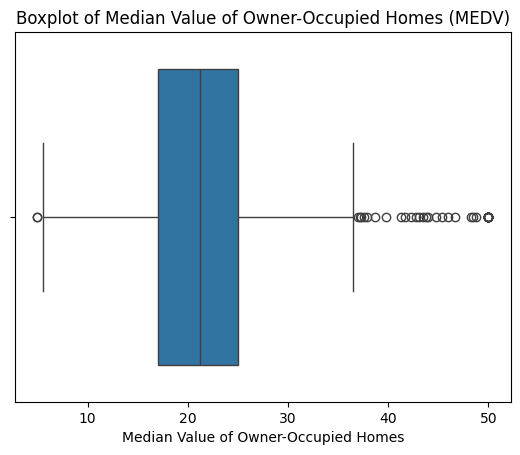

In [6]:
sns.boxplot(x='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('Median Value of Owner-Occupied Homes')
pyplot.show()

2. **Bar Plot for the Charles River Variable:**

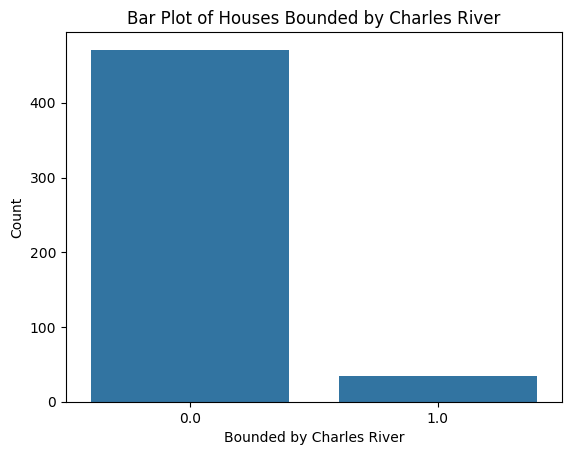

In [7]:
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Houses Bounded by Charles River')
pyplot.xlabel('Bounded by Charles River')
pyplot.ylabel('Count')
pyplot.show()

3. **Boxplot of MEDV vs. AGE:**

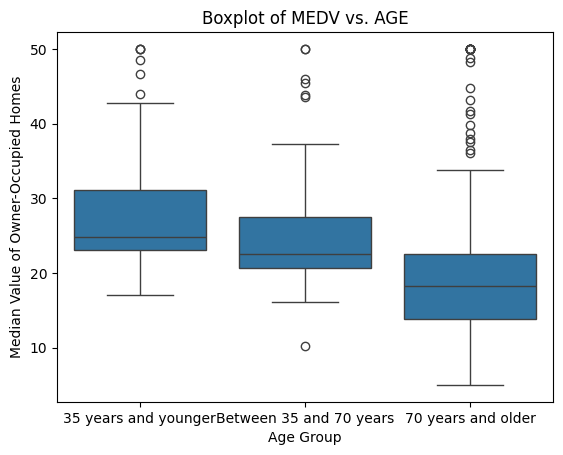

In [9]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs. AGE')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes')
pyplot.show()

4. **Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres:**

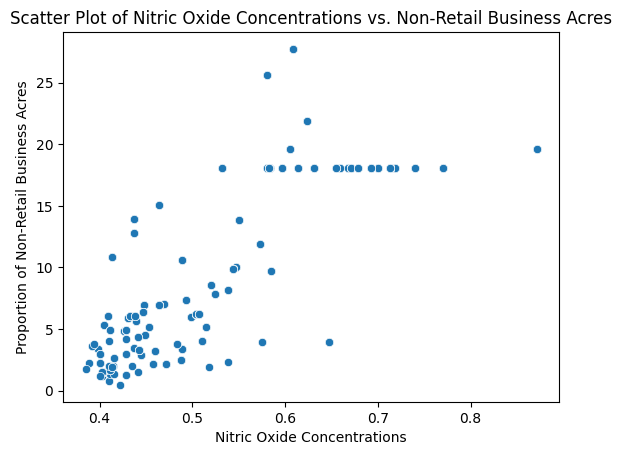

In [10]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs. Non-Retail Business Acres')
pyplot.xlabel('Nitric Oxide Concentrations')
pyplot.ylabel('Proportion of Non-Retail Business Acres')
pyplot.show()

5. **Histogram of Pupil to Teacher Ratio:**

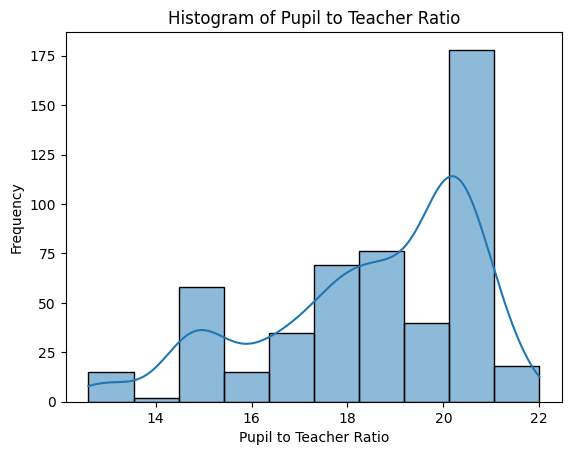

In [11]:
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

## Task 3: Use the appropriate tests to answer the questions provided

1. **Is there a significant difference in the median value of houses bounded by the Charles river or not? (T-test for independent samples)**

**Hypothesis:**

+ Null Hypothesis (H0): There is no significant difference in median house values between houses bounded and not bounded by the Charles River.

+ Alternative Hypothesis (H1): There is a significant difference in median house values between houses bounded and not bounded by the Charles River.

**Perform the Test:**

In [13]:
medv_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(medv_bounded, medv_not_bounded)

print("T-test Statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject null hypothesis. There is a significant difference in median house values.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no significant difference in median house values.")

T-test Statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject null hypothesis. There is a significant difference in median house values.


2. **Is there a difference in median values of houses for each proportion of owner-occupied units built before 1940? (ANOVA)**

**Hypothesis:**

+ Null Hypothesis (H0): There is no significant difference in median house values across different age groups of owner-occupied units.

+ Alternative Hypothesis (H1): There is a significant difference in median house values across different age groups of owner-occupied units.

**Perform the Test:**

In [14]:
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

alpha = 0.05
p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print("Conclusion: Reject null hypothesis. There is a significant difference in median house values across different age groups.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no significant difference in median house values across different age groups.")

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Conclusion: Reject null hypothesis. There is a significant difference in median house values across different age groups.


3. **Can we conclude that there is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)**
   
**Hypothesis:**

+ Null Hypothesis (H0): There is no significant correlation between nitric oxide concentrations and the proportion of non-retail business acres per town.

+ Alternative Hypothesis (H1): There is a significant correlation between nitric oxide concentrations and the proportion of non-retail business acres per town.

**Perform the Test:**

In [15]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject null hypothesis. There is a significant correlation between nitric oxide concentrations and non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no significant correlation between nitric oxide concentrations and non-retail business acres per town.")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Conclusion: Reject null hypothesis. There is a significant correlation between nitric oxide concentrations and non-retail business acres per town.


4. **What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)**

**Hypothesis:**

We'll examine the coefficients of the regression model to understand the impact.

**Perform the Analysis:**

In [16]:
X = boston_df['DIS'] 
y = boston_df['MEDV']  
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        12:32:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0